## Chapter 2.

### Problem 1.
evaluate the Uhlig matrices for thee Brock and Mirman Model.

In [1]:
import numpy as np

In [2]:
beta = .98
alpha = .35
N = .9

K = (alpha * beta) **(1 / (1 - alpha))
denom = (K**alpha - K)

F = beta * (alpha * K ** (alpha - 1))/ denom
G = -1*beta * ((alpha*K**(alpha-1)) * (alpha + K ** (alpha-1) ) ) / denom
H = beta * (alpha**2 * K**(2*(alpha-1))) / denom
L = (-1*beta * alpha * K ** alpha) / denom
M = beta * (alpha  * K ** (2*alpha - 1)) / denom

print(F, G, H, L, M )

2.708076157015596 -8.843092418849325 2.7633430173628524 -0.5220700152207002 1.5220700152207003


In [3]:
P = (-1*G - np.sqrt(G**2 - 4*F*H)) / (2 * F)  # picking the one P that is smaller than 1 in absolute value
Q = -1 * (L*N + M) / (F*N + F*P + G)
print(P, Q)

0.35 0.19278261945


In [4]:
def PF(k, z, kbar):
    k_prime = kbar + P*(k-kbar) + Q*z
    return k_prime

# compute closed form solution
def cl(kvec, zvec):
    kprime = alpha*beta* np.outer(np.exp(zvec), kvec**alpha)
    return kprime

In [5]:
# generating the same  vector of z's like in the previous chapter
from rouwen import rouwen
rho = .9
sigma = .02
mu = 0
gridsize = 25
gridrange = 2 * 5 * sigma
stepsize = gridrange / (gridsize -1)
pi, zvec = rouwen(rho, mu, step=stepsize, num=gridsize)

# and the same k vector 
k_star = (1/(beta*alpha))**(1/(alpha-1))
k_ub = 1.5 * k_star
k_lb = 0.5 * k_star
num = 25
kvec = np.linspace(k_lb, k_ub , num)
kvec = kvec.reshape(25,1)
kvec.shape

(25, 1)

In [6]:
k_anal = cl(kvec, zvec)

In [7]:
kmat = np.repeat(kvec, 25, axis=1).T
optK = PF(kmat, zvec, K)

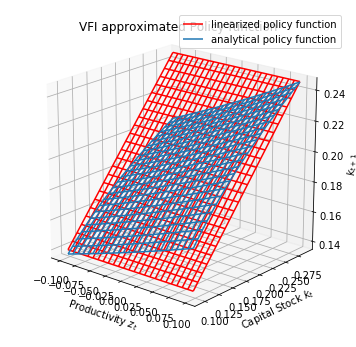

In [8]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
#%matplotlib notebook


zmat, kmat = np.meshgrid(kvec, zvec)
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
# ax.plot_surface(kmat, zmat, optK, rstride=1, cstride=1, cmap=cm.Blues,
#                 linewidth=0, antialiased=False)
# ax.plot_wireframe(kmat, zmat, k_anal, rstride=1, cstride=1, cmap=cm.magma,
#                 linewidth=0, antialiased=False)
ax.plot_wireframe(kmat, zmat, optK, color='r', label='linearized policy function') 
ax.plot_wireframe(kmat, zmat, k_anal, label='analytical policy function')

ax.view_init(elev=20., azim=-50)  # to rotate plot for better view
ax.set_xlabel(r'Productivity $z_t$')
ax.set_ylabel(r'Capital Stock $k_t$')
ax.set_zlabel(r'$k_{t+1}$')
plt.legend()
plt.title('VFI approximated Policy function')
plt.show()

### Problem 2.

In [9]:
#F2 = alpha*alpha*beta*np.exp(alpha*K)/(np.exp(alpha*K) - np.exp(K))
#L2 = (alpha*beta*(np.exp((alpha-1)*K))*(np.exp(alpha*K)-np.exp(K)) - np.exp(2*alpha*K - K))/(np.exp(alpha*K) - np.exp(K))
#G2 = (-alpha * np.exp(alpha*K) - alpha**2 *np.exp((2*alpha-1)*K) / ((np.exp(alpha*K) - np.exp(K))
#M2 = (alpha*beta*np.exp((alpha-1)*K)*np.exp(alpha*K))/(np.exp(alpha*K) - np.exp(K))
#H2 = alpha*beta*(np.exp(2*alpha*K-K))/(np.exp(alpha*K) - np.exp(K))

In [10]:
#G =   ((np.exp((alpha - 1) * kbar) * (alpha * np.exp(2 * kbar) - np.exp(2*alpha*kbar)+(1-alpha) * np.exp((alpha + 1) * kbar) )) / 
#       ((np.exp(alpha * kbar) - np.exp(kbar)) ** 2))

### Problem 3.
plug in the guess for the policy function $\tilde{X}_{t+1} = PX_t + Q\tilde{Z}_{t+1}$ and the law of motion for the shock $\tilde{Z}_t= N\tilde{Z}_{t-1} + \varepsilon_t$ and write the equation only in terms of the predetermined state variables

$$ E_t [F\tilde{X}_{t+1} +GX_t +H\tilde{X}_{t-1} +L\tilde{Z}_{t+1} +M\tilde{Z}_t] $$
$$ = E_t [F(P\tilde{X}_t + Q\tilde{Z}_{t+1}) +G(P\tilde{X}_{t-1} + Q\tilde{Z}_{t}) +H\tilde{X}_{t-1} +L(N\tilde{Z}_t + \varepsilon_{t+1})  +M\tilde{Z}_t]$$
$$ = E_t [F(P^2\tilde{X}_{t-1} +PQ \tilde{Z}_t +   QN\tilde{Z}_{t} +Q\varepsilon_{t+1}) +G(P\tilde{X}_{t-1} + Q\tilde{Z}_{t}) +H\tilde{X}_{t-1} +L(N\tilde{Z}_t + \varepsilon_{t+1})  +MZ_t] $$

applying the rational expectation operator and using $E_t\varepsilon_{t+1}=0$ we get

$$ = F(P^2\tilde{X}_{t-1} + PQ\tilde{Z}_t + QN\tilde{Z}_{t}) +G(P\tilde{X}_{t-1} + Q\tilde{Z}_{t}) +H\tilde{X}_{t-1} +LN\tilde{Z}_t +  +M\tilde{Z}_t $$

simplifying to

$$ =  [P(FP +G)+H]\tilde{X}_{t-1} + [(FQ +L)N+(FP+G)Q+M]\tilde{Z}_t$$

### Problem 4.
Find the Steady State of the baseline tax model numercally. Which is exactly the same exercise as Problem 6 from Chapter 1...right?

In [11]:
from scipy.optimize import fsolve
gamma = 2.5
beta = .98
alpha = .4
delta = .1
tau = .05
xi = 1.5
a = 0.5
zbar = 0.0
params = (alpha, beta, gamma, delta, tau, xi, a, zbar)

In [12]:
def errors(inits, *args):
    alpha, beta, gamma, delta, tau, xi, a, zbar = args
    c, w, r, k, T, l, i, z = inits
    
    err1 = c - (1 - tau) * (w*l + (r - delta)*k) - T
    err2 = (c **(-1*gamma) - beta * (c ** (-1*gamma)) * ((r - delta)*(1 - tau) 
                                   + 1 ))
    err3 = a/((1 - l)**xi) - 1/(c ** gamma) * w * (1 - tau)
    err4 = r - alpha * (k / l) ** (alpha - 1) * np.exp(zbar) ** (1-alpha)
    err5 = w - (1 - alpha) * np.exp(zbar) ** (1-alpha) * (k / l) ** alpha
    err6 = tau * (w * l + (r - delta)*k) - T
    err7 = i - k + (1 - delta) * k
    err8 = z - zbar
    
    return np.array([err1, err2, err3, err4, err5, err6, err7, err8])

In [13]:
inits_6 = np.array([0.5, 1.2, 0.5, 0.5, 0.5, 0.5, 0.3, 0.0])
ss = fsolve(errors, inits_6, args=params)
cb, wb, rb, kb, Tb, lb, ib, zb = ss
print('Steady State values')
print('c:',ss[0], 'w:',ss[1], 'r:',ss[2], 'k:',ss[3], 'T:',ss[4], 'l:',ss[5], 'i:', ss[6], 'z:', ss[7])

Steady State values
c: 0.860703206099 w: 1.32795276826 r: 0.121482277134 k: 4.22522902569 T: 0.0430351603049 l: 0.579791453139 i: 0.422522902569 z: 0.0


### Problem 5.
find all derivatives of the steady states w.r.t all the parameters.

In [14]:
dx = 1e-10
selmat = np.zeros((8,8))
np.fill_diagonal(selmat, dx, 8)
params_init = np.array([alpha, beta, gamma, delta, tau, xi, a, zbar])

derivatives = np.empty((8, 8))
for i in range(8):
    perturb = selmat[i]
    perturbed = np.reshape(perturb + params_init, (8))
    ss_p = fsolve(errors, inits_6, args=tuple(perturbed))
    derv = (ss_p - ss) / dx
    derivatives[i] = derv

In [15]:
import pandas as pd
ders = pd.DataFrame(derivatives, columns = ['d c','d w', 'd r', 'd k', 'd T', 'd l', 'd i', 'd z'])

ders.index = ['d alpha', 'd beta', 'd gamma', 'd delta', 'd tau', 'd xi', 'd a', 'd zbar']
ders = ders.round(3)
ders

,d c,d w,d r,d k,d T,d l,d i,d z
d alpha,2.085,4.396,-0.000,25.985,0.104,-0.769,2.599,0.0
d beta,1.751,7.987,-1.096,65.431,0.088,0.260,6.543,0.0
d gamma,0.028,-0.000,0.000,0.139,0.001,0.019,0.014,0.0
d delta,-3.511,-7.287,1.000,-48.350,-0.176,1.320,-0.610,0.0
d tau,-0.234,-0.165,0.023,-2.323,0.849,-0.139,-0.232,0.0
d xi,-0.163,0.000,-0.000,-0.802,-0.008,-0.110,-0.080,0.0
d a,-0.377,0.000,-0.000,-1.849,-0.019,-0.254,-0.185,0.0
d zbar,0.578,1.328,-0.000,2.838,0.029,-0.190,0.284,1.0


Columns correspond to the change in the steady states of the respective variables due to a chenge in the parameters that are listed in each row.

### Problem 6.

I repeat the characterizing equations of the basline model for convenience:

$$c_t^{-\gamma} = \beta E_t \{ c_{t+1}^{-\gamma} [(r_{t+1} - \delta)(1-\tau) + 1 ]\} $$

$$ a(1 - l_t)^{- \xi} = c_t^{- \gamma} w_t (1 - \tau)$$

$$ z_t = (1 - \rho)\overline{z} + \rho z_{t-1} + \epsilon_t^2 $$

The following equations are the "model definitions" that explicitly define variabes dependent on the state variables and the parameters:
$$ c_t = (1 - \tau) [w_t \mathscr{l}_t + (r_t - \delta) k_t] + k_t + T_t - k_{t+1} $$

$$r_t = \alpha k_t^{\alpha - 1} (e^{z_t} \mathscr{l}_t) ^ {1 - \alpha}$$

$$w_t = (1-\alpha) (e^{z_t})^{1-\alpha} \left( \frac{k_t}{\mathscr{l}_t}\right)^{\alpha}$$

$$ T = \tau [w_t\mathscr{l}_t + (r_t - \delta) k_t] $$

$$ i = k_{t+1} - (1 - \delta)k_t$$



Define $X_t = (k_{t-1}, \mathscr{l}_t )$ to include all variables that are not explicitly defined by the equations above. Then the second and the third equation can be defined to be a system in $X_t$. Therefore define new functions:

In [16]:
def modelDefs(Xp, X, Y, Z, params):
    '''
    Xp and X are the values of the predetermined state variabe (in this case k_t) and its future values k_t+1
    Y is in this case labor
    Z is the endogenous shocks
    params contains all model parameters
    
    Out: returns a vector of the variables r, w, T and i that are explicitly defined
    '''
    alpha, beta, gamma, delta, tau, xi, a, zbar = params
    
    kp = Xp
    k = X
    l = Y
    z = Z
    
    r = alpha * (k / l) ** (alpha - 1) * np.exp(z) ** (1-alpha)
    w = (1 - alpha) * np.exp(z) ** (1-alpha) * (k / l) ** alpha
    T = tau * (w * l + (r - delta)*k)
    c = (1 - tau) * (w*l + (r - delta)*k) + k + T - kp
    i = kp - (1 - delta) * k
    
    defs = np.array([r, w, T, i, c])
    return r, w, T, i, c

In [17]:
modelDefs(kb, kb, lb, zb, params)

(0.1214822771366898,
 1.3279527682396981,
 0.043035160304645804,
 0.42252290256888703,
 0.86070320609291606)

In [18]:
def euler(Theta ,params):
    '''
    This function defines the the intertemporal and the labor-leisure euler equations
    
    In:
       Theta: vector of values of the state variables in all time periods needed
       to evaluate the modelDefs in two consecutive periods
    '''
    alpha, beta, gamma, delta, tau, xi, a, zbar = params
    Xpp, Yp, Xp, Y, X, Yk, Zp, Z = Theta
    
    kp = Xp
    k = X
    l = Y
    z = Z
    
    r, w, T, i, c = modelDefs(Xp, X, Y, Z, params)
    rp, wp, Tp, ip, cp = modelDefs(Xpp, Xp, Yp, Zp, params)
    
    E_inter = (c **(-1*gamma) - beta * (cp ** (-1*gamma)) * ((rp - delta)*(1 - tau) + 1 ))
    E_ll = a /((1 - l) **xi) - 1/(c ** gamma) * w * (1 - tau)
    
    return np.array([E_inter, E_ll])

In [19]:
# check if the return zero in the steady state
Theta_SS = (kb, lb, kb, lb, kb, lb, 0.0, 0.0)
euler(Theta_SS, params)
# this looks like it should

array([ -2.07458495e-11,  -3.58795216e-10])

In [20]:
import scipy as sp
import scipy.optimize as opt
from LinApp_FindSS import LinApp_FindSS
from LinApp_Deriv import LinApp_Deriv
from LinApp_Solve import LinApp_Solve

In [21]:
# set LinApp parameters
Zbar = np.array([0.])
nx = 2
ny = 0
nz = 1
logX = 1
Sylv = 0

In [22]:
# take a guess for steady state values of k and ell
guessXY = np.array([.1, .25])

# find the steady state values using LinApp_FindSS
XYbar = LinApp_FindSS(euler, params, guessXY, Zbar, nx, ny)
(kbar, lbar) = XYbar
print ('XYbar: ', XYbar)

# set up steady state input vector
theta0 = np.array([kb, lb, kb, lb, kb, lb, 0., 0.])

# check SS solution
check = euler(theta0, params)
print ('check: ', check)
if np.max(np.abs(check)) > 1.E-6:
    print ('Have NOT found steady state')

XYbar:  [ 4.22522903  0.57979145]
check:  [ -2.07458495e-11  -3.58795216e-10]


In [23]:
rbar, wbar, Tbar, ibar, cbar = modelDefs(kbar, kbar, lbar, 0, params)

print("Steady State")
print ('rbar: ', rbar)
print ('wbar: ', wbar)
print ('Tbar: ', Tbar)
print ('ibar: ', ibar)
print ('cbar: ', cbar)

Steady State
rbar:  0.121482277121
wbar:  1.32795276835
Tbar:  0.0430351603077
ibar:  0.422522902678
cbar:  0.860703206154


In [24]:
# this is actually number 6

# find the derivatives matrices
[AA, BB, CC, DD, FF, GG, HH, JJ, KK, LL, MM, WW, TT] = \
    LinApp_Deriv(euler, params, theta0, nx, ny, nz, logX)
print('FF: ', FF)
print('GG: ', GG)
print('HH: ', HH)
print('LL: ', LL)
print('MM: ', MM)

# set value for NN    
NN = rho
    
# find the policy and jump function coefficients
PP, QQ, UU, RR, SS, VV = \
    LinApp_Solve(AA,BB,CC,DD,FF,GG,HH,JJ,KK,LL,MM,WW,TT,NN,Zbar,Sylv)
print ('PP:',PP)
print ('QQ', QQ)
#print ('RR:',RR)
#print ('SS', SS)

FF:  [[-17.85678588   3.15518743]
 [  0.           0.        ]]
GG:  [[ 36.19591326  -3.25392452]
 [-22.52731983   8.63824988]]
HH:  [[-18.2403903    0.        ]
 [ 22.27702703   0.        ]]
LL:  [[ 3.15518743]
 [ 0.        ]]
MM:  [[-3.25392451]
 [ 3.00365877]]
Sylvester equation solver condition is not satisfied; proceed with the original method...
PP: [[ 0.9152937   0.        ]
 [-0.19192697  0.        ]]
QQ [[ 0.1289971 ]
 [-0.01131015]]


### Problem 7.

In [25]:
# put together the policy functions that depend only on k_t-1 and z_t
def genr_shock(N, kbar, zbar, sigma, PP, QQ, periods, times):
    
    z_series = np.zeros((times, periods))
    eps_series = np.random.normal(loc=0.0, scale=sigma, size=(times, periods-1))
    k_series = np.zeros((times, periods))
    l_series = np.zeros((times, periods))   
    
    for t in range(1, periods):
        z_series[:,t] = N * z_series[:,t-1] + eps_series[:,t-1]
        k_series[:,t] = PP[0, 0] * k_series[:,t-1] + QQ[0, 0] * z_series[:,t]
        l_series[:,t] = PP[1, 0] * k_series[:,t-1] + QQ[1, 0] * z_series[:,t]
    
    # convert back to levels
    z_series += zbar
    k_series = kbar * np.exp(k_series)
    l_series = kbar * np.exp(l_series)
    
    return z_series, k_series, l_series

In [26]:
np.random.seed(123)
zvec, kvec, lvec = genr_shock(rho, kbar, 0.0, 0.02, PP, QQ, 250, 10000)

In [27]:
def gdp(k, l, z, params):
    alpha, beta, gamma, delta, tau, xi, a, zbar = params
    out = k ** alpha * (l * np.exp(z)) ** (1 - alpha)
    return out

Y = gdp(kvec, lvec, zvec, params)

In [28]:
_, _, _, I, C = modelDefs(Xp=kvec[:,1:], X=kvec[:,:-1], Y=lvec[:,:-1], Z=zvec[:,:-1], params=params)

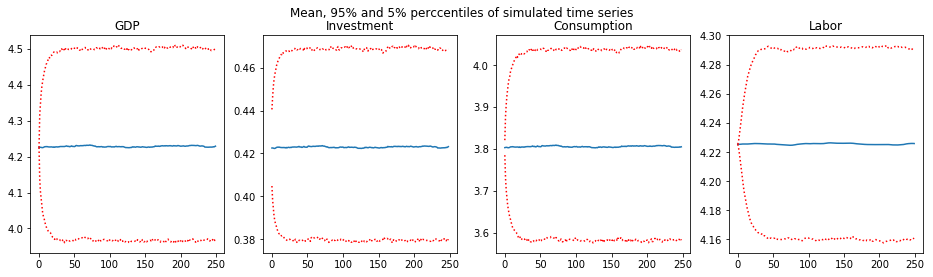

In [29]:
aggregates = [Y, I, C, lvec]
labels = ['GDP', 'Investment', 'Consumption', 'Labor']
plt.close()
fig, ax = plt.subplots(1, 4, figsize=(16,4))
t = np.arange(1, 250)

for i in range(4):
    var = aggregates[i]
    avg = var.mean(axis=0)
    five = np.percentile(var, 5, axis=0)
    ninty5 = np.percentile(var, 95, axis=0)
    ax[i].plot(avg)
    ax[i].plot(five, 'r:')
    ax[i].plot(ninty5, 'r:')
    ax[i].set_title(labels[i])
plt.suptitle('Mean, 95% and 5% perccentiles of simulated time series')
plt.show()

### Problem 9

In [30]:
def imp_res(impulse, periods, PP, QQ):
        
    z_series = np.zeros(periods+2)
    z_series[2] = impulse
    k_series = np.zeros(periods+2)
    l_series = np.zeros(periods+2)   
    
    for t in range(3, periods+2):
        z_series[t] = N * z_series[t-1]
        k_series[t] = PP[0, 0] * k_series[t-1] + QQ[0, 0] * z_series[t]
        l_series[t] = PP[1, 0] * k_series[t-1] + QQ[1, 0] * z_series[t]
    
    z_series += zbar
    k_series = kbar * np.exp(k_series)
    l_series = kbar * np.exp(l_series)
    
    return z_series, k_series, l_series

In [31]:
z_imp, kres, lres = imp_res(0.02, 40, PP, QQ)

In [32]:
Yres = gdp(kres, lres, z_imp, params)

_, _, _, Ires, Cres = modelDefs(Xp=kres[1:], X=kres[:-1], Y=lres[:-1], Z=z_imp[:-1], params=params)

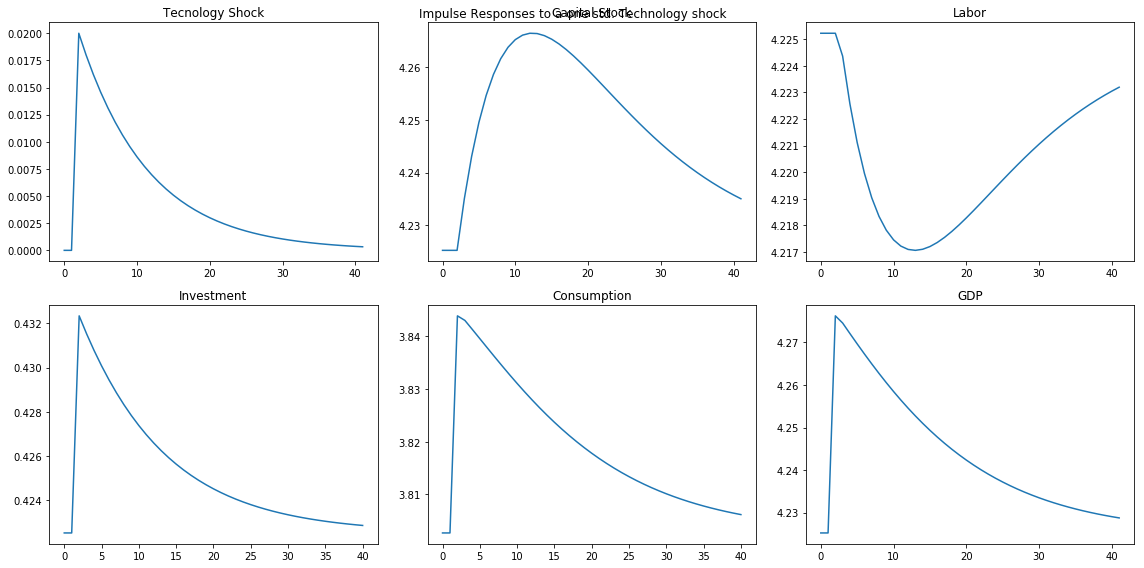

In [33]:
responses = [z_imp, kres, lres, Ires, Cres, Yres]
labels = ['Tecnology Shock', 'Capital Stock', 'Labor', 'Investment', 'Consumption', 'GDP']

fig, axes = plt.subplots(2, 3, figsize=(16,8))
t = np.arange(-2, 40)

kK = 0
for i in range(2):
    for j in range(3):
        var = responses[kK]
        axes[i, j].plot(var)
        #ax[i].plot(np.zeros(len(var)), 'k--')
        axes[i, j].set_title(labels[kK])
        kK += 1
plt.tight_layout()
plt.suptitle('Impulse Responses to a one std. Technology shock')
plt.show()

### Problem 10.
Solving the OLG model again. But linearized this time.

In [34]:
beta_pa = 0.96
beta = beta_pa ** 20
### risk aversion coefficient
sigma = 3.0
### depreciation rate per period
delta_pa = 0.05
delta = 1 - (1 - 0.05) ** 20

rho_z = .9
sig_z = 0.02
## aggregate labor suppöy
n_1 = 1.0
n_2 = 1.0
n_3 = 0.2
nvec = np.array([n_1, n_2, n_3])

# firms parameters
## TFP
A = 1.0
## capital share of income
alpha = 0.35
OLG_params = [beta, sigma, delta, delta, nvec, alpha]

In [35]:
def get_c(nvec, w, r, b2p, b3p, b2, b3):
    c1 = nvec[0] * w - b2p
    c2 = nvec[1] * w + (1 + r) * b2 - b3p
    c3 = nvec[2] * w + (1 + r) * b3
    
    return c1, c2, c3

def get_mu(c_s, sigma):
    return c_s ** (-1.0 * sigma)

In [36]:
def OLGdefs(b2p, b3p, b2, b3, z, params):
    
    beta, sigma, delta, delta, nvec, alpha = params
    
    K = b2 + b3
    L = np.sum(nvec)
    r = alpha * np.exp(z) * (L / K) ** (1 - alpha) - delta
    w = (1 - alpha) * np.exp(z) * (K / L) ** alpha
    
    c1, c2, c3 = get_c(nvec, w, r, b2p, b3p, b2, b3)
    
    return K, L, r, w, c1, c2, c3

In [37]:
OLGdefs(0.01931274,  0.05841159, 
        0.01931274,  0.05841159, 
        0.0, OLG_params)

(0.07772433,
 2.2000000000000002,
 2.4330301537532528,
 0.20172529712183276,
 0.18241255712183277,
 0.20961492589342934,
 0.24087380922303853)

In [38]:
def OLG_euler(Xguess, params):
    
    beta, sigma, delta, delta, nvec, alpha = params
    b2pp, b3pp, b2p, b3p, b2, b3, zp, z = Xguess
    
    K, L, r, w, c1, c2, c3 = OLGdefs(b2p, b3p, b2, b3, z, params)
    Kp, Lp, rp, wp, c1p, c2p, c3p = OLGdefs(b2pp, b3pp, b2p,
                                            b3p, zp, params)
    
    # geschummelt... und vermutlich falsch
    # c3pp = nvec[2] * wp + (1 + rp) * b3p
    
    # first euler equation
    lhs_1 = get_mu(c1, sigma)
    rhs_1 = beta * (1 + rp) * get_mu(c2p, sigma)
    err_1 = lhs_1 - rhs_1

    # second euler equations
    lhs_2 = get_mu(c2, sigma)
    rhs_2 = beta * (1 + rp) * get_mu(c3p, sigma)
    err_2 = lhs_2 - rhs_2
    
    return np.array([err_1, err_2])

In [39]:
X_test = np.array([0.01931274,  0.05841159 , 
                   0.01931274,  0.05841159,
                   0.01931274,  0.05841159,
                   0.0, 0.0])
OLG_euler(X_test, OLG_params)

array([  5.25158314e-05,  -3.71016403e-05])

In [40]:
b2_init = 0.02
b3_init = 0.2
Xguess = np.array([b2_init, b3_init]),

In [41]:
Zbar = np.array([0.])
nx = 2
ny = 0
nz = 1
logX = 1
Sylv = 1

In [42]:
###### find the steady state values using LinApp_FindSS
XYbar = LinApp_FindSS(OLG_euler, OLG_params, Xguess, Zbar, nx, ny)
b2bar, b3bar = XYbar
print ('XYbar: ', XYbar)

# set up steady state input vector
Xbar = np.array([b2bar, b3bar, b2bar, b3bar, b2bar, b3bar, 0.0, 0.0])

# check SS solution
check = OLG_euler(Xbar, OLG_params)
print ('check: ', check)
if np.max(np.abs(check)) > 1.E-6:
    print ('Have NOT found steady state')

XYbar:  [ 0.01931274  0.05841159]
check:  [  4.83169060e-13  -1.46371804e-12]


In [43]:
# find the derivatives matrices
[AA, BB, CC, DD, FF, GG, HH, JJ, KK, LL, MM, WW, TT] = \
    LinApp_Deriv(OLG_euler, OLG_params, Xbar, nx, ny, nz, logX)

print('FF: ', FF)
print('GG: ', GG)
print('HH: ', HH)
print('LL: ', LL)
print('MM: ', MM)

# set value for NN    
NN = rho_z
    
# find the policy and jump function coefficients
PP, QQ, UU, RR, SS, VV = \
    LinApp_Solve(AA,BB,CC,DD,FF,GG,HH,JJ,KK,LL,MM,WW,TT,NN,Zbar,Sylv)
print ('PP:',PP)
print ('QQ', QQ)

FF:  [[   0.         -137.73170527]
 [   0.            0.        ]]
GG:  [[ 251.24888853  128.79694684]
 [ -18.77371406  305.15657881]]
HH:  [[ -47.53544321 -143.77149723]
 [-115.38666178  -37.37975929]]
LL:  [[ 468.11869861]
 [ 200.17332552]]
MM:  [[-546.59124783]
 [-405.73709328]]
Sylvester equation solver condition is not satisfied; proceed with the original method...
PP: [[ 0.03530577  0.63635012]
 [ 0.38029487  0.16164297]]
QQ [[ 0.6985173 ]
 [ 0.78220455]]


C:\Users\Max\Anaconda3\lib\site-packages\ipykernel\__main__.py:16: RuntimeWarning: overflow encountered in exp


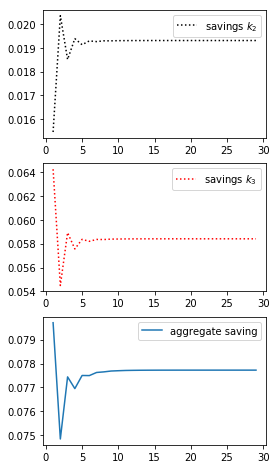

In [44]:
# compute the adjustemt to steady state
def OLG_policy(Xvec, PP):
    Xp = PP @ Xvec
    return Xp

# remember everythin  is in deviations from STST
X_init = np.array([np.log(0.8) , np.log(1.1)])
TP_hat = np.empty((30, 2))

for t in range(1, 30):
    TP_hat[t] = X_init
    Xp_hat = OLG_policy(X_init, PP)
    X_init = np.copy(Xp_hat)

# map back to levels
TP = XYbar * np.exp(TP_hat)
K_plot = TP.sum(axis=1)

fig, axes = plt.subplots(3, 1, figsize=(4, 8))
axes[0].plot(TP[:,0], 'k:', label=r'savings $k_2$')
axes[0].legend()
axes[1].plot(TP[:,1], 'r:', label=r'savings $k_3$')
axes[1].legend()
axes[2].plot(K_plot, label='aggregate saving')
axes[2].legend()
plt.show()

This actully looks exaclty like the solution from the Problem Set from week 1. 

### Problem 11.
introduce an aggregate production shock into the OLG model:

I have actually put the shock in there from the beginning.

In [45]:
def OLG_policy2(Xvec, z):
    Xp = PP @ Xvec + QQ.T * z
    return Xp

In [46]:
sim_periods = 250
times = 10000
n = len(XYbar)

k2_series = np.zeros((sim_periods, times))
k3_series = np.zeros((sim_periods, times))
big_Z = np.zeros((sim_periods, times))
for i in range(times):
    X_series = np.zeros((n, sim_periods))
    z_series = np.zeros((1, sim_periods))
    eps = np.random.normal(loc=0.0, scale=sig_z, size=(1, sim_periods))
    
    for t in range(1, sim_periods-1):
        z_series[:,t+1] = rho_z * z_series[:,t] + eps[:,t+1]
        X_series[:,t+1] = OLG_policy2(X_series[:,t+1], z_series[:,t+1])
    
    big_Z[:,1] = z_series
    k2_series[:,i] = X_series[0, :] 
    k3_series[:,i] = X_series[1, :]
    
k2_series = b2bar * np.exp(k2_series)
k3_series = b3bar * np.exp(k3_series)

In [47]:
Ks, Ls, rs, ws, c1s, c2s, c3s = OLGdefs(k2_series[1:], k3_series[1:], k2_series[:-1],
                                 k3_series[:-1], big_Z[:-1], OLG_params)
Cs = c1s + c2s + c3s
GDP = np.exp(big_Z[:-1]) * Ks ** alpha * Ls ** (1 - alpha)
indicators = [GDP, Cs, Ks]
olg_labs = ['GDP', 'Consumption', 'Capital Stock']

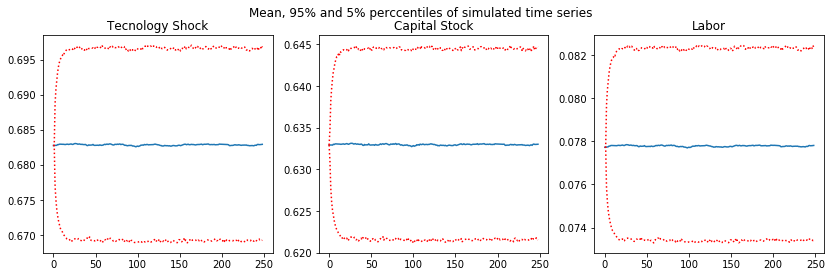

In [48]:
fig, ax = plt.subplots(1, 3, figsize=(14, 4))

for i in range(3):
    var = indicators[i]
    avg = var.mean(axis=1)
    five = np.percentile(var, 5, axis=1)
    ninty5 = np.percentile(var, 95, axis=1)
    ax[i].plot(avg)
    ax[i].plot(five, 'r:')
    ax[i].plot(ninty5, 'r:')
    ax[i].set_title(labels[i])
plt.suptitle('Mean, 95% and 5% perccentiles of simulated time series')
plt.show()